In [1]:
from brian2 import *
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import ks_2samp
import pickle
import matplotlib.pyplot as plt

In [2]:

s = [0.25,0.75]    

In [3]:
window_size = 50 * ms
step_size = 10 *ms
n_steps = round((1000*ms)/step_size) 
n_steps
  
t_max = np.linspace(500*ms, 1000*ms, n_steps)

In [4]:
def rmse_in_window(spike_monitor_readout, center, windowsize, N_readouts, readout_theta_0, s, offset):

    spike_times = spike_monitor_readout['t']
    spike_IDs = spike_monitor_readout['i']
    idx_t_lower = np.argwhere(spike_times[:] > center - windowsize/2) #find all spikes within lower time bound
    idx_t_start = np.argwhere(spike_times[:] > offset) #find all spikes after stimulus step change
    idx_t_upper = np.argwhere(spike_times[:] < center + windowsize/2) #find all spikes within upper time bound
    
    # extract spikes within the time window and that are within the later half of the stimulus presentation time
    idx = np.intersect1d(idx_t_start, idx_t_lower)
    idx = np.intersect1d(idx, idx_t_upper)
    
    if len(idx)>0:
        spike_time = spike_times[idx] #save the spike timings
        spike_ID = spike_IDs[idx] #save the spike IDs

        errs = s - readout_theta_0[spike_IDs[idx]]
        # due to the circular stimulus and responses, the error is the smallest of the 3 possibilities
        sq_errs = np.minimum((errs)**2, (errs + 1)**2)
        sq_errs = np.minimum((errs -1)**2, sq_errs)
    
    else:
        sq_errs = (0.5)**2 #if no spike give maximal error
    rmse = np.sqrt(np.mean(sq_errs))

    return rmse

In [5]:
def pop_rates_in_window(spike_monitor_readout, center, windowsize, N_readouts, offset):
    spike_times = spike_monitor_readout['t']
    spike_IDs = spike_monitor_readout['i']
    idx_t_lower = np.argwhere(spike_times[:] > center - windowsize/2) #find all spikes within lower time bound
    idx_t_start = np.argwhere(spike_times[:] > offset) #find all spikes after stimulus step change
    idx_t_upper = np.argwhere(spike_times[:] < center + windowsize/2) #find all spikes within upper time bound
    idx = np.intersect1d(idx_t_start, idx_t_lower)
    idx = np.intersect1d(idx, idx_t_upper)
    
    spike_times = spike_times[idx]
    spike_IDs = spike_IDs[idx]
    #adjust window size for edge conditions
    windowsize_temp = np.minimum(center + windowsize/2, 2*offset) - np.maximum(center - windowsize/2, offset)
    pop_output_rate = np.size(spike_IDs)/windowsize_temp

    return pop_output_rate

In [6]:
def readout_rates(spike_monitor_readout, N_readouts, offset, windowsize):    
    spike_times = spike_monitor_readout['t']
    spike_IDs = spike_monitor_readout['i']

    idx = np.argwhere(spike_times[:] > offset) #find all spikes after stimulus step change

    
    spike_times = spike_times[idx]
    spike_IDs = spike_IDs[idx]
    output_rates = np.zeros([N_readouts])
    for k in range(0,len(spike_times)):
        output_rates[spike_IDs[k]] += 1 
    output_rates = output_rates/windowsize
    return output_rates

In [7]:
N_readouts = 400 
objects = []
n_trials = 30
readout_theta_0 = np.linspace(0,1, N_readouts + 1)
readout_theta_0 = readout_theta_0[:-1]
for k in range(0,n_trials):
    with (open('./data/Gaussian_population/data_readout_layer_run_idx_{}.pickle'.format(k), "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
rmse_Gaussian = np.zeros([n_trials, n_steps])
population_rate_Gaussian = np.zeros([n_trials, n_steps])
readout_rates_Gaussian = np.zeros([n_trials,N_readouts])
offset = 500*ms
for count, t_center in enumerate(t_max):
    for k in range(0,n_trials):
        rmse_Gaussian[k,count] = rmse_in_window(objects[k], t_center , window_size, N_readouts, readout_theta_0, s[1], offset)
        population_rate_Gaussian[k,count] = pop_rates_in_window(objects[k], t_center, window_size, N_readouts, offset)

readout_rates_Gaussian[k,:] =  readout_rates(spike_monitor_readout, N_readouts, offset, 500*ms)       


0.5
0
0.5
0
0.4975
0
0.5
0
0.5
0
0.5
0
0.05500000000000005
0
0.42500000000000004
3
0.4425
1
0.5
0
0.5
0
0.5
0
0.32999999999999996
0
0.5
0
0.4975
0
0.3075
0
0.4875
1
0.49249999999999994
0
0.41500000000000004
1
0.4475
0
0.48250000000000004
0
0.47250000000000003
0
0.5
0
0.3575
0
0.4475
0
0.4175
0
0.5
0
0.35250000000000004
0
0.425
0
0.5
0
0.5
0
0.5
0
0.4975
0
0.03249999999999997
0
0.5
0
0.020000000000000018
0
0.020000000000000018
1
0.42500000000000004
3
0.4425
1
0.5
0
0.5
0
0.030000000000000027
0
0.32999999999999996
0
0.4525
0
0.4975
0
0.040000000000000036
1
0.4875
1
0.49249999999999994
0
0.41500000000000004
1
0.4475
0
0.48250000000000004
0
0.4125
1
0.5
0
0.3575
0
0.4475
0
0.4175
0
0.5
0
0.35250000000000004
0
0.425
0
0.38
0
0.5
0
0.33499999999999996
1
0.4975
0
0.03249999999999997
0
0.5
0
0.020000000000000018
0
0.020000000000000018
1
0.42500000000000004
3
0.4425
1
0.0625
0
0.5
0
0.030000000000000027
0
0.32999999999999996
0
0.4525
0
0.4575
1
0.040000000000000036
1
0.4875
1
0.4924999999999999

0.0
5
0.010000000000000009
3
0.007499999999999951
3
0.0024999999999999467
1
0.010000000000000009
1
0.0
1
0.012500000000000067
1
0.0
1
0.007500000000000062
0
0.010000000000000009
2
0.010000000000000009
0
0.0024999999999999467
2
0.010000000000000009
6
0.012499999999999956
3
0.010000000000000009
1
0.0025000000000000577
6
0.015000000000000013
6
0.0024999999999999467
0
0.01749999999999996
1
0.0025000000000000577
2
0.0024999999999999467
1
0.0
1
0.0
6
0.0024999999999999467
0
0.007499999999999951
2
0.007499999999999951
2
0.0024999999999999467
0
0.06499999999999995
2
0.03749999999999998
0
0.007499999999999951
3
0.0
4
0.010000000000000009
2
0.007499999999999951
3
0.0024999999999999467
0
0.010000000000000009
1
0.0
1
0.012500000000000067
0
0.0
0
0.007500000000000062
0
0.010000000000000009
2
0.010000000000000009
0
0.0024999999999999467
2
0.010000000000000009
5
0.0050000000000000044
4
0.010000000000000009
1
0.0025000000000000577
5
0.015000000000000013
5
0.012499999999999956
4
0.0025000000000000577
4

0.010000000000000009
1
0.0050000000000000044
0
0.0050000000000000044
0
0.05249999999999999
0
0.01750000000000007
1
0.007500000000000062
5
0.0050000000000000044
5
0.025000000000000022
0
0.020000000000000018
3
0.01749999999999996
1
0.015000000000000013
3
0.0024999999999999467
2
0.020000000000000018
0
0.03749999999999998
0
0.0050000000000000044
4
0.025000000000000022
1
0.0025000000000000577
2
0.0
1
0.012500000000000067
5
0.020000000000000018
3
0.03249999999999997
2
0.0050000000000000044
4
0.0025000000000000577
5
0.0024999999999999467
1
0.010000000000000009
4
0.007499999999999951
2
0.0025000000000000577
6
0.010000000000000009
0
0.010000000000000009
5
0.0024999999999999467
2
0.010000000000000009
1
0.0050000000000000044
1
0.0050000000000000044
0
0.0024999999999999467
3
0.01750000000000007
0
0.007500000000000062
5
0.0050000000000000044
5
0.025000000000000022
0
0.012500000000000067
5
0.01749999999999996
1
0.007500000000000062
6
0.0024999999999999467
2
0.020000000000000018
0
0.05749999999999999

0.015000000000000013
3
0.0024999999999999467
2
0.007499999999999951
0
0.010000000000000009
4
0.007499999999999951
3
0.0050000000000000044
2
0.010000000000000009
5
0.0050000000000000044
3
0.010000000000000009
5
0.007499999999999951
3
0.0
4
0.03749999999999998
0
0.0050000000000000044
1
0.0
2
0.007499999999999951
2
0.010000000000000009
0
0.0
3
0.0025000000000000577
0
0.0
1
0.0
2
0.022499999999999964
0
0.0025000000000000577
5
0.0
1
0.015000000000000013
0
0.0024999999999999467
2
0.07250000000000001
0
0.01750000000000007
4
0.01749999999999996
2
0.012499999999999956
2
0.01750000000000007
1
0.010000000000000009
7
0.0024999999999999467
2
0.010000000000000009
0
0.010000000000000009
3
0.007499999999999951
3
0.0050000000000000044
1
0.010000000000000009
4
0.0050000000000000044
1
0.010000000000000009
4
0.007499999999999951
3
0.0
4
0.010000000000000009
5
0.0050000000000000044
0
0.0
1
0.020000000000000018
0
0.0050000000000000044
6
0.0
3
0.0025000000000000577
0
0.0
1
0.0
2
0.022499999999999964
0
0.0025

0.012499999999999956
4
0.007500000000000062
6
0.05500000000000005
3
0.010000000000000009
1
0.03249999999999997
1
0.0050000000000000044
0
0.012500000000000067
2
0.025000000000000022
4
0.007499999999999951
0
0.0
2
0.01749999999999996
1
0.0
7
0.0024999999999999467
6
0.0025000000000000577
1
0.007499999999999951
3
0.007500000000000062
0
0.012500000000000067
3
0.0025000000000000577
3
0.015000000000000013
1
0.01749999999999996
0
0.015000000000000013
3
0.0025000000000000577
4
0.022499999999999964
4
0.0
0
0.02749999999999997
3
0.010000000000000009
1
0.0025000000000000577
3
0.03249999999999997
1
0.0025000000000000577
0
0.012500000000000067
0
0.010000000000000009
4
0.007500000000000062
5
0.05500000000000005
3
0.007499999999999951
4
0.012500000000000067
5
0.0025000000000000577
5
0.0050000000000000044
4
0.025000000000000022
4
0.01749999999999996
0
0.0
1
0.01749999999999996
0
0.0
3
0.0024999999999999467
4
0.0025000000000000577
0
0.007499999999999951
2
0.007500000000000062
0
0.012500000000000067
2
0.

0.0
5
0.0
2
0.015000000000000013
2
0.010000000000000009
0
0.012500000000000067
0
0.0024999999999999467
4
0.0050000000000000044
0
0.025000000000000022
1
0.0050000000000000044
0
0.0
4
0.0024999999999999467
4
0.007499999999999951
3
0.0
3
0.022499999999999964
1
0.007499999999999951
6
0.007500000000000062
0
0.0024999999999999467
2
0.040000000000000036
3
0.010000000000000009
4
0.010000000000000009
4
0.0025000000000000577
1
0.0050000000000000044
1
0.015000000000000013
1
0.0050000000000000044
3
0.0
3
0.015000000000000013
2
0.007500000000000062
0
0.0025000000000000577
6
0.012499999999999956
2
0.010000000000000009
1
0.0
4
0.0
0
0.015000000000000013
2
0.012499999999999956
0
0.012500000000000067
0
0.0024999999999999467
4
0.012500000000000067
2
0.010000000000000009
4
0.0050000000000000044
0
0.0
4
0.0024999999999999467
2
0.007499999999999951
3
0.0
3
0.007500000000000062
7
0.007499999999999951
5
0.007500000000000062
0
0.0024999999999999467
1
0.025000000000000022
4
0.010000000000000009
4
0.01000000000

NameError: name 'spike_monitor_readout' is not defined

In [8]:
N_readouts = 400 
objects = []
n_trials = 30
readout_theta_0 = np.linspace(0,1, N_readouts + 1)
readout_theta_0 = readout_theta_0[:-1]
for k in range(0,n_trials):
    with (open('./data/Periodic_population/data_readout_layer_run_idx_{}.pickle'.format(k), "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
rmse_Periodic = np.zeros([n_trials, n_steps])
offset = 500*ms
population_rate_Periodic = np.zeros([n_trials, n_steps])
readout_rates_Periodic = np.zeros([n_trials,N_readouts])
for count, t_center in enumerate(t_max):
    for k in range(0,n_trials):
        rmse_Periodic[k,count] = rmse_in_window(objects[k], t_center , window_size, N_readouts, readout_theta_0, s[1], offset)
        population_rate_Periodic[k,count] = pop_rates_in_window(objects[k], t_center, window_size, N_readouts, offset)

readout_rates_Periodic[k,:] =  readout_rates(spike_monitor_readout, N_readouts, offset, 500*ms)   

0.4775
0
0.010000000000000009
1
0.5
0
0.4475
1
0.030000000000000027
1
0.4075
1
0.47
3
0.4775
0
0.44999999999999996
0
0.49
0
0.47
0
0.49
0
0.44999999999999996
1
0.46249999999999997
0
0.49
0
0.25
1
0.44999999999999996
1
0.35
1
0.030000000000000027
1
0.49
0
0.25
0
0.44999999999999996
0
0.44999999999999996
0
0.3525
0
0.4975
0
0.4375
2
0.5
0
0.4775
0
0.38749999999999996
2
0.475
0
0.4775
0
0.010000000000000009
1
0.5
0
0.37
4
0.030000000000000027
1
0.4075
1
0.47
3
0.43
2
0.44999999999999996
0
0.49
0
0.47
0
0.49
0
0.44999999999999996
1
0.46249999999999997
0
0.49
0
0.25
1
0.44999999999999996
1
0.35
1
0.022499999999999964
2
0.010000000000000009
2
0.25
0
0.44999999999999996
0
0.01750000000000007
2
0.010000000000000009
1
0.4975
0
0.4375
2
0.49
0
0.4775
0
0.38749999999999996
2
0.030000000000000027
1
0.32000000000000006
2
0.010000000000000009
1
0.5
0
0.37
4
0.030000000000000027
1
0.36750000000000005
2
0.47
3
0.010000000000000009
3
0.44999999999999996
0
0.49
0
0.47
0
0.49
0
0.44999999999999996
1
0.46

0.010000000000000009
5
0.42999999999999994
0
0.45
0
0.0025000000000000577
4
0.010000000000000009
3
0.010000000000000009
3
0.020000000000000018
0
0.030000000000000027
3
0.010000000000000009
2
0.0025000000000000577
3
0.48
2
0.030000000000000027
0
0.010000000000000009
0
0.47
2
0.0025000000000000577
4
0.010000000000000009
2
0.0
5
0.365
1
0.0024999999999999467
1
0.030000000000000027
1
0.010000000000000009
2
0.010000000000000009
0
0.010000000000000009
3
0.09750000000000003
2
0.0050000000000000044
4
0.0
4
0.0025000000000000577
1
0.0
2
0.007500000000000062
5
0.0025000000000000577
0
0.010000000000000009
4
0.42999999999999994
0
0.10250000000000004
2
0.0025000000000000577
4
0.010000000000000009
3
0.010000000000000009
3
0.0025000000000000577
2
0.030000000000000027
3
0.010000000000000009
2
0.0025000000000000577
2
0.48
2
0.0025000000000000577
2
0.010000000000000009
0
0.010000000000000009
4
0.0025000000000000577
4
0.010000000000000009
2
0.0
5
0.365
1
0.0024999999999999467
1
0.030000000000000027
1
0.0

0.010000000000000009
1
0.0
1
0.0025000000000000577
0
0.0024999999999999467
2
0.0025000000000000577
2
0.010000000000000009
1
0.0024999999999999467
4
0.0024999999999999467
0
0.0
1
0.030000000000000027
0
0.01750000000000007
2
0.0
4
0.022499999999999964
2
0.0
2
0.010000000000000009
2
0.0050000000000000044
3
0.0
4
0.010000000000000009
3
0.0
3
0.030000000000000027
2
0.010000000000000009
2
0.010000000000000009
1
0.0025000000000000577
2
0.0
5
0.0
1
0.0025000000000000577
0
0.010000000000000009
1
0.0050000000000000044
2
0.010000000000000009
2
0.022499999999999964
1
0.010000000000000009
1
0.0
1
0.0025000000000000577
0
0.0024999999999999467
2
0.0025000000000000577
2
0.010000000000000009
1
0.0024999999999999467
3
0.0024999999999999467
0
0.0
1
0.010000000000000009
4
0.01750000000000007
2
0.0
4
0.010000000000000009
3
0.0
2
0.010000000000000009
1
0.0050000000000000044
2
0.0
3
0.010000000000000009
3
0.0
2
0.010000000000000009
4
0.010000000000000009
2
0.010000000000000009
1
0.0025000000000000577
2
0.0
5

0.0024999999999999467
2
0.022499999999999964
1
0.0
5
0.022499999999999964
3
0.0025000000000000577
2
0.010000000000000009
2
0.0050000000000000044
0
0.010000000000000009
2
0.0025000000000000577
2
0.010000000000000009
0
0.010000000000000009
0
0.0024999999999999467
6
0.012499999999999956
1
0.0024999999999999467
2
0.022499999999999964
1
0.0050000000000000044
3
0.0025000000000000577
2
0.012500000000000067
4
0.010000000000000009
1
0.0050000000000000044
0
0.007499999999999951
3
0.0
3
0.010000000000000009
1
0.0024999999999999467
2
0.030000000000000027
1
0.010000000000000009
0
0.010000000000000009
3
0.007500000000000062
3
0.010000000000000009
3
0.01750000000000007
1
0.0024999999999999467
2
0.022499999999999964
1
0.0
4
0.022499999999999964
3
0.0025000000000000577
1
0.010000000000000009
2
0.0050000000000000044
0
0.010000000000000009
2
0.0025000000000000577
2
0.010000000000000009
0
0.010000000000000009
0
0.0024999999999999467
6
0.012499999999999956
1
0.0024999999999999467
2
0.010000000000000009
4
0

0.010000000000000009
3
0.010000000000000009
0
0.0
3
0.0
3
0.010000000000000009
0
0.050000000000000044
1
0.0024999999999999467
3
0.0
0
0.007500000000000062
3
0.0025000000000000577
3
0.0025000000000000577
0
0.0025000000000000577
1
0.0050000000000000044
0
0.007499999999999951
5
0.0
2
0.010000000000000009
0
0.0024999999999999467
0
0.0025000000000000577
0
0.010000000000000009
0
0.010000000000000009
1
0.010000000000000009
1
0.0025000000000000577
5
0.0
2
0.0050000000000000044
3
0.010000000000000009
2
0.025000000000000022
2
0.02749999999999997
1
0.022499999999999964
0
0.0050000000000000044
0
0.010000000000000009
3
0.010000000000000009
2
0.010000000000000009
0
0.0
3
0.0
3
0.010000000000000009
0
0.21999999999999997
0
0.0024999999999999467
3
0.0025000000000000577
4
0.007500000000000062
3
0.0025000000000000577
2
0.0025000000000000577
0
0.0025000000000000577
1
0.015000000000000013
3
0.007499999999999951
5
0.0
2
0.010000000000000009
0
0.0025000000000000577
0
0.0025000000000000577
0
0.010000000000000

0.010000000000000009
2
0.0
2
0.0025000000000000577
5
0.010000000000000009
0
0.010000000000000009
4
0.0025000000000000577
4
0.0025000000000000577
2
0.010000000000000009
2
0.010000000000000009
0
0.0
4
0.0025000000000000577
2
0.010000000000000009
0
0.0025000000000000577
1
0.010000000000000009
2
0.0
4
0.0024999999999999467
1
0.010000000000000009
1
0.010000000000000009
0
0.010000000000000009
0
0.0
3
0.0025000000000000577
0
0.0
4
0.01750000000000007
0
0.04500000000000004
2
0.010000000000000009
3
0.0050000000000000044
0
0.0
3
0.0025000000000000577
3
0.020000000000000018
0
0.010000000000000009
1
0.010000000000000009
1
0.0
1
0.0025000000000000577
5
0.010000000000000009
3
0.010000000000000009
2
0.0025000000000000577
4
0.0025000000000000577
2
0.010000000000000009
2
0.010000000000000009
0
0.0
4
0.0025000000000000577
2
0.010000000000000009
0
0.0025000000000000577
0
0.010000000000000009
2
0.0
3
0.0024999999999999467
0
0.010000000000000009
1
0.010000000000000009
0
0.010000000000000009
2
0.0
3
0.01000

NameError: name 'spike_monitor_readout' is not defined

In [14]:
time_vec = np.ones([n_trials,len(t_max)])
stim_vec = np.ones([n_trials,len(t_max)])
for k in range(0,n_trials):
    time_vec[k,:] = t_max*time_vec[k,:]
data_Gaussian  = np.reshape(rmse_Gaussian, [np.size(rmse_Gaussian)])
data_Periodic = np.reshape(rmse_Periodic, [np.size(rmse_Periodic)])

data_Time = np.reshape(time_vec, [np.size(time_vec)]) - 0.5
data = np.vstack([data_Gaussian, data_Periodic, data_Time])
df = pd.DataFrame(np.transpose(data), columns=["RMSE Gaussian Pop.", "RMSE Periodic Pop.", "Decoding Time"])


In [11]:
upper_pntl_Periodic = np.zeros([np.size(t_max)])
lower_pntl_Periodic = np.zeros([np.size(t_max)])
upper_pntl_Gaussian = np.zeros([np.size(t_max)])
lower_pntl_Gaussian = np.zeros([np.size(t_max)])

mean_Periodic = np.zeros([np.size(t_max)])
median_Periodic = np.zeros([np.size(t_max)])
mean_Gaussian = np.zeros([np.size(t_max)])
median_Gaussian = np.zeros([np.size(t_max)])

for count, t_stop in enumerate(t_max): 
    upper_pntl_Periodic[count] = np.percentile(rmse_Periodic[:,count], 95)
    lower_pntl_Periodic[count] = np.percentile(rmse_Periodic[:,count], 5)
    mean_Periodic[count] = np.mean(rmse_Periodic[:,count])
    median_Periodic[count] = np.median(rmse_Periodic[:,count])
    
    upper_pntl_Gaussian[count] = np.percentile(rmse_Gaussian[:,count], 95)
    lower_pntl_Gaussian[count] = np.percentile(rmse_Gaussian[:,count], 5)
    mean_Gaussian[count] = np.mean(rmse_Gaussian[:,count])
    median_Gaussian[count] = np.median(rmse_Gaussian[:,count])

<Figure size 432x288 with 0 Axes>

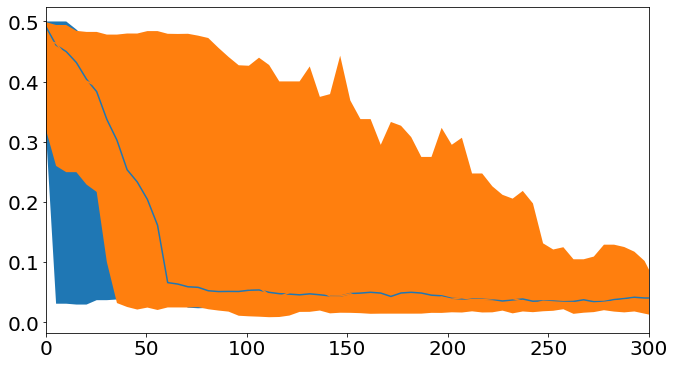

In [12]:
plt.figure()
fig, ax = plt.subplots(figsize=(6*1.8,6))
plt.rcParams['font.size'] = '20'

ax.plot((t_max -0.5*second)*1000, median_Gaussian)
ax.fill_between((t_max -0.5*second)*1000, lower_pntl_Gaussian, upper_pntl_Gaussian)
ax.plot((t_max -0.5*second)*1000, median_Periodic)
ax.fill_between((t_max -0.5*second)*1000, lower_pntl_Periodic, upper_pntl_Periodic)
ax.set_xlim(0,300)
plt.savefig('./figures/Fig4c_bottom.png')
plt.savefig('./figures/Fig4c_bottom.eps', format='eps')

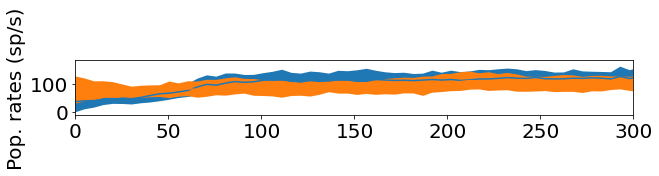

In [13]:
fig, ax = plt.subplots(figsize=(10,1))
plt.rcParams['font.size'] = '20'
mean_pop_Gaussian = np.mean(population_rate_Gaussian,0)
sd_pop_Gaussian = np.std(population_rate_Gaussian,0)
mean_pop_Periodic = np.mean(population_rate_Periodic,0)
sd_pop_Periodic = np.std(population_rate_Periodic,0)

ax.plot((t_max -0.5*second)*1000, mean_pop_Gaussian)
ax.fill_between((t_max -0.5*second)*1000, mean_pop_Gaussian - sd_pop_Gaussian, mean_pop_Gaussian + sd_pop_Gaussian)
ax.plot((t_max -0.5*second)*1000, mean_pop_Periodic)
ax.fill_between((t_max -0.5*second)*1000, mean_pop_Periodic - sd_pop_Periodic, mean_pop_Periodic + sd_pop_Periodic)
ax.set_xlim(0,300)
plt.ylabel("Pop. rates (sp/s)")
plt.savefig('./figures/Fig4c_top.png')
plt.savefig('./figures/Fig4c_top.eps', format='eps')